In [ ]:



''' ******************************************************
****************************    imports    ***************
********************************************************'''
import os
import torch
from torch import nn
from time import time
from torch import optim
import torchvision as tv
from google.colab import drive
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms_Direction

# -*- coding: utf-8 -*-
import torch
import matplotlib.pyplot as plt
from time import time
import torchvision as tv
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as InvertTransforms
import torchvision.transforms as OriginalTransforms

cuda= True
batch_size = 1000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Data_generated:
    def __init__(self, Realimage,TransImage,target,label,device):
        super().__init__()
        self.device= device
        self.target=target.squeeze().to(self.device)
        self.label=label.squeeze().to(self.device)
        self.Realimage=Realimage.squeeze()
        self.Realimage=Realimage.to(self.device)
        self.TransImage=TransImage.squeeze()
        self.TransImage=TransImage.to(self.device)
    def to(self, device):
        self.device= device
        self.target=self.target.to(self.device)
        self.label=self.label.to(self.device)
        self.Realimage=Realimage.to(self.device)
        self.TransImage=TransImage.to(self.device)
    def __len__(self):
      return self.image.size(0)
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        sample = (self.Realimage[idx],self.TransImage[idx],  self.target[idx],self.label[idx,0])

        return sample
    def size(self):
     

        sample = (self.Realimage.size(),self.TransImage.size(),  self.target.size(),self.label.size())

        return sample
    def add_data(self,x,w,y,z):
      x=x.squeeze().to(self.device)
      y=y.squeeze().to(self.device)
      z=z.squeeze().to(self.device)
      w=w.squeeze().to(self.device)


      self.Realimage= torch.cat((self.Realimage,x),0)
      self.TransImage= torch.cat((self.TransImage,w),0)

      self.target=torch.cat((self.target,y),0)
      self.label=torch.cat((self.label,z),0)



def Invert_transform(batch_size, maximum_size ):
  import torchvision.transforms as transforms_Direction
  tf=  transforms_Direction.RandomAffine(degrees=0, translate=(0.0,0),  scale=(1,1), shear=(0,0,0,0))
  root_direction="Invert/"
  transfer_type= torch.ones((batch_size, 1), device=device)
  for i in range (batch_size):
    transfer_type[i,0]= 6
  print("label= 6 Invert")

  transforms_Direction = transforms_Direction.Compose([
              tf,
              transforms_Direction.ToTensor(),
              transforms_Direction.Normalize(mean = ( 0.5,),std = ( 0.5, )), ])

  Odataset_Direction = datasets.MNIST(root=root_direction, transform=transforms_Direction, download=True)
  Odataloader_Direction = DataLoader(Odataset_Direction, batch_size=batch_size, shuffle=False)
  transforms_Direction=None
  import torchvision.transforms as transforms_Direction

  transforms_Direction = transforms_Direction.Compose([
              tf,
              transforms_Direction.Resize([32,32]),
              transforms_Direction.ToTensor(),
              transforms_Direction.Normalize(mean = ( 0.5,),std = ( 0.5, )),
              transforms_Direction.functional.invert,
              
          ])
  
  Idataset_Direction = datasets.MNIST(root=root_direction, transform=transforms_Direction, download=True)
  Idataloader_Direction = DataLoader(Idataset_Direction, batch_size=batch_size, shuffle=False)
  first= True;
  max_batch= maximum_size/batch_size
  for batch, (samples_Direction, y) in enumerate(Odataloader_Direction):
    if (batch<=max_batch):
      samples_Direction=samples_Direction.squeeze()
      if first== True:
        Real= samples_Direction
        first=False
      else:
        Real=torch.cat((Real,samples_Direction),0) #fake[i] = generated image by experts[i] 
        




  first= True;
  max_batch= maximum_size/batch_size
  for batch, (samples_Direction, y) in enumerate(Idataloader_Direction):
    if (batch<=max_batch):
      samples_Direction=samples_Direction.squeeze()
      if first== True:
        generated= samples_Direction
        target= y
        transfer_Type= transfer_type
        first=False
      else:
        generated=torch.cat((generated,samples_Direction),0) #fake[i] = generated image by experts[i] 
        target=torch.cat((target,y),0)
        transfer_Type=torch.cat((transfer_Type,transfer_type),0)

    
  return Real.squeeze(), generated.squeeze() ,target.squeeze(),transfer_Type.squeeze()

  import torchvision.transforms as transforms_Direction
  tf=  transforms_Direction.RandomAffine(degrees=0, translate=(0.0,0),  scale=(1,1), shear=(0,0,0,0))
  root_direction="Invert/"
  transfer_type= torch.ones((batch_size, 1), device=device)
  for i in range (batch_size):
    transfer_type[i,0]= 6
  print("label= 6 Invert")

  transforms_Direction = transforms_Direction.Compose([
              tf,
              transforms_Direction.ToTensor(),
              transforms_Direction.Normalize(mean = ( 0.5,),std = ( 0.5, )), ])

  Odataset_Direction = datasets.MNIST(root=root_direction, transform=transforms_Direction, download=True)
  Odataloader_Direction = DataLoader(Odataset_Direction, batch_size=batch_size, shuffle=False)
  transforms_Direction=None
  import torchvision.transforms as transforms_Direction

  transforms_Direction = transforms_Direction.Compose([
              tf,
              transforms_Direction.Resize([32,32]),
              transforms_Direction.ToTensor(),
              transforms_Direction.Normalize(mean = ( 0.5,),std = ( 0.5, )),
              transforms_Direction.functional.invert,
              
          ])
  
  Idataset_Direction = datasets.MNIST(root=root_direction, transform=transforms_Direction, download=True)
  Idataloader_Direction = DataLoader(Idataset_Direction, batch_size=batch_size, shuffle=False)
  first= True;
  max_batch= maximum_size/batch_size
  for batch, (samples_Direction, y) in enumerate(Odataloader_Direction):
    if (batch<=max_batch):
      samples_Direction=samples_Direction.squeeze()
      if first== True:
        Real= samples_Direction
        first=False
      else:
        Real=torch.cat((Real,samples_Direction),0) #fake[i] = generated image by experts[i] 
        




  first= True;
  max_batch= maximum_size/batch_size
  for batch, (samples_Direction, y) in enumerate(Idataloader_Direction):
    if (batch<=max_batch):
      samples_Direction=samples_Direction.squeeze()
      if first== True:
        generated= samples_Direction
        target= y
        transfer_Type= transfer_type
        first=False
      else:
        generated=torch.cat((generated,samples_Direction),0) #fake[i] = generated image by experts[i] 
        target=torch.cat((target,y),0)
        transfer_Type=torch.cat((transfer_Type,transfer_type),0)

    
  return Real.squeeze(), generated.squeeze() ,target.squeeze(),transfer_Type.squeeze()




In [ ]:
import torch
import matplotlib.pyplot as plt
from time import time
import torchvision as tv
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms_Direction

cuda= True
batch_size = 1000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def RotateLeft_transform( batch_size, maximum_size ):
  import torchvision.transforms as transforms_Direction
  tf=  transforms_Direction.RandomAffine(degrees=0, translate=(0.0,0),  scale=(1,1), shear=(0,0,0,0))
  root_direction="RotateLeft/"
  transfer_type= torch.ones((batch_size, 1), device=device)
  for i in range (batch_size):
    transfer_type[i,0]= 2
  print("label= 2 Rotate Left")

  transforms_Direction = transforms_Direction.Compose([
              tf,
              transforms_Direction.ToTensor(),
              transforms_Direction.Normalize(mean = ( 0.5,),std = ( 0.5, )), ])

  Odataset_Direction = datasets.MNIST(root=root_direction, transform=transforms_Direction, download=True)
  Odataloader_Direction = DataLoader(Odataset_Direction, batch_size=batch_size, shuffle=False)
  transforms_Direction=None
  import torchvision.transforms as transforms_Direction
  tf=  transforms_Direction.RandomAffine(degrees=(20,40), translate=(0.0,0),  scale=(1,1), shear=(0,0,0,0))

  transforms_Direction = transforms_Direction.Compose([
              tf,
              transforms_Direction.Resize([32,32]),
              transforms_Direction.ToTensor(),
              transforms_Direction.Normalize(mean = ( 0.5,),std = ( 0.5, )),
              
          ])
  
  Idataset_Direction = datasets.MNIST(root=root_direction, transform=transforms_Direction, download=True)
  Idataloader_Direction = DataLoader(Idataset_Direction, batch_size=batch_size, shuffle=False)
  first= True;
  max_batch= maximum_size/batch_size
  for batch, (samples_Direction, y) in enumerate(Odataloader_Direction):
    if (batch<=max_batch):
      samples_Direction=samples_Direction.squeeze()
      if first== True:
        Real= samples_Direction
        first=False
      else:
        Real=torch.cat((Real,samples_Direction),0) #fake[i] = generated image by experts[i] 
        




  first= True;
  max_batch= maximum_size/batch_size
  for batch, (samples_Direction, y) in enumerate(Idataloader_Direction):
    if (batch<=max_batch):
      samples_Direction=samples_Direction.squeeze()
      if first== True:
        generated= samples_Direction
        target= y
        transfer_Type= transfer_type
        first=False
      else:
        generated=torch.cat((generated,samples_Direction),0) #fake[i] = generated image by experts[i] 
        target=torch.cat((target,y),0)
        transfer_Type=torch.cat((transfer_Type,transfer_type),0)

    
  return Real.squeeze(), generated.squeeze() ,target.squeeze(),transfer_Type.squeeze()





#====================================================================================================================




In [ ]:
import torch
import matplotlib.pyplot as plt
from time import time
import torchvision as tv
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms_Direction

cuda= True
batch_size = 1000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def RotateRight_transform( batch_size, maximum_size ):
  import torchvision.transforms as transforms_Direction
  tf=  transforms_Direction.RandomAffine(degrees=0, translate=(0.0,0),  scale=(1,1), shear=(0,0,0,0))
  root_direction="RotateRight/"
  transfer_type= torch.ones((batch_size, 1), device=device)
  for i in range (batch_size):
    transfer_type[i,0]= 3
  print("label= 3 Rotate Right")

  transforms_Direction = transforms_Direction.Compose([
              tf,
              transforms_Direction.ToTensor(),
              transforms_Direction.Normalize(mean = ( 0.5,),std = ( 0.5, )), ])

  Odataset_Direction = datasets.MNIST(root=root_direction, transform=transforms_Direction, download=True)
  Odataloader_Direction = DataLoader(Odataset_Direction, batch_size=batch_size, shuffle=False)
  transforms_Direction=None
  import torchvision.transforms as transforms_Direction
  tf=  transforms_Direction.RandomAffine(degrees=(-30,-20), translate=(0.0,0),  scale=(1,1), shear=(0,0,0,0))

  transforms_Direction = transforms_Direction.Compose([
              tf,
              transforms_Direction.Resize([32,32]),
              transforms_Direction.ToTensor(),
              transforms_Direction.Normalize(mean = ( 0.5,),std = ( 0.5, )),
              
          ])
  
  Idataset_Direction = datasets.MNIST(root=root_direction, transform=transforms_Direction, download=True)
  Idataloader_Direction = DataLoader(Idataset_Direction, batch_size=batch_size, shuffle=False)
  first= True;
  max_batch= maximum_size/batch_size
  for batch, (samples_Direction, y) in enumerate(Odataloader_Direction):
    if (batch<=max_batch):
      samples_Direction=samples_Direction.squeeze()
      if first== True:
        Real= samples_Direction
        first=False
      else:
        Real=torch.cat((Real,samples_Direction),0) #fake[i] = generated image by experts[i] 
        




  first= True;
  max_batch= maximum_size/batch_size
  for batch, (samples_Direction, y) in enumerate(Idataloader_Direction):
    if (batch<=max_batch):
      samples_Direction=samples_Direction.squeeze()
      if first== True:
        generated= samples_Direction
        target= y
        transfer_Type= transfer_type
        first=False
      else:
        generated=torch.cat((generated,samples_Direction),0) #fake[i] = generated image by experts[i] 
        target=torch.cat((target,y),0)
        transfer_Type=torch.cat((transfer_Type,transfer_type),0)

    
  return Real.squeeze(), generated.squeeze() ,target.squeeze(),transfer_Type.squeeze()





#====================================================================================================================




In [ ]:
import torch
import matplotlib.pyplot as plt
from time import time
import torchvision as tv
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms_Direction

cuda= True
batch_size = 1000
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def RotateLeft_transform( batch_size, maximum_size ):
  import torchvision.transforms as transforms_Direction
  tf=  transforms_Direction.RandomAffine(degrees=0, translate=(0.0,0),  scale=(1,1), shear=(0,0,0,0))
  root_direction="RotateLeft/"
  transfer_type= torch.ones((batch_size, 1), device=device)
  for i in range (batch_size):
    transfer_type[i,0]= 2
  print("label= 2 Rotate Left")

  transforms_Direction = transforms_Direction.Compose([
              tf,
              transforms_Direction.ToTensor(),
              transforms_Direction.Normalize(mean = ( 0.5,),std = ( 0.5, )), ])

  Odataset_Direction = datasets.MNIST(root=root_direction, transform=transforms_Direction, download=True)
  Odataloader_Direction = DataLoader(Odataset_Direction, batch_size=batch_size, shuffle=False)
  transforms_Direction=None
  import torchvision.transforms as transforms_Direction
  tf=  transforms_Direction.RandomAffine(degrees=(20,40), translate=(0.0,0),  scale=(1,1), shear=(0,0,0,0))

  transforms_Direction = transforms_Direction.Compose([
              tf,
              transforms_Direction.Resize([32,32]),
              transforms_Direction.ToTensor(),
              transforms_Direction.Normalize(mean = ( 0.5,),std = ( 0.5, )),
              
          ])
  
  Idataset_Direction = datasets.MNIST(root=root_direction, transform=transforms_Direction, download=True)
  Idataloader_Direction = DataLoader(Idataset_Direction, batch_size=batch_size, shuffle=False)
  first= True;
  max_batch= maximum_size/batch_size
  for batch, (samples_Direction, y) in enumerate(Odataloader_Direction):
    if (batch<=max_batch):
      samples_Direction=samples_Direction.squeeze()
      if first== True:
        Real= samples_Direction
        first=False
      else:
        Real=torch.cat((Real,samples_Direction),0) #fake[i] = generated image by experts[i] 
        




  first= True;
  max_batch= maximum_size/batch_size
  for batch, (samples_Direction, y) in enumerate(Idataloader_Direction):
    if (batch<=max_batch):
      samples_Direction=samples_Direction.squeeze()
      if first== True:
        generated= samples_Direction
        target= y
        transfer_Type= transfer_type
        first=False
      else:
        generated=torch.cat((generated,samples_Direction),0) #fake[i] = generated image by experts[i] 
        target=torch.cat((target,y),0)
        transfer_Type=torch.cat((transfer_Type,transfer_type),0)

    
  return Real.squeeze(), generated.squeeze() ,target.squeeze(),transfer_Type.squeeze()





#====================================================================================================================




label= 6 Invert



Extracting Invert/MNIST/raw/train-images-idx3-ubyte.gz to Invert/MNIST/raw




Extracting Invert/MNIST/raw/train-labels-idx1-ubyte.gz to Invert/MNIST/raw




Extracting Invert/MNIST/raw/t10k-images-idx3-ubyte.gz to Invert/MNIST/raw




Extracting Invert/MNIST/raw/t10k-labels-idx1-ubyte.gz to Invert/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


label= 3 Rotate Right
Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting RotateRight/MNIST/raw/train-images-idx3-ubyte.gz to RotateRight/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting RotateRight/MNIST/raw/train-labels-idx1-ubyte.gz to RotateRight/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting RotateRight/MNIST/raw/t10k-images-idx3-ubyte.gz to RotateRight/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting RotateRight/MNIST/raw/t10k-labels-idx1-ubyte.gz to RotateRight/MNIST/raw

Processing...
Done!
label= 2 Rotate Left
Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting RotateLeft/MNIST/raw/train-images-idx3-ubyte.gz to RotateLeft/MNIST/raw




Extracting RotateLeft/MNIST/raw/train-labels-idx1-ubyte.gz to RotateLeft/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting RotateLeft/MNIST/raw/t10k-images-idx3-ubyte.gz to RotateLeft/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting RotateLeft/MNIST/raw/t10k-labels-idx1-ubyte.gz to RotateLeft/MNIST/raw

Processing...
Done!
answer (torch.Size([63000, 28, 28]), torch.Size([63000, 32, 32]), torch.Size([63000]), torch.Size([63000]))


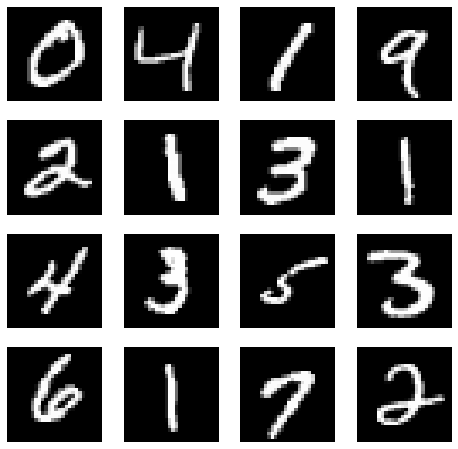

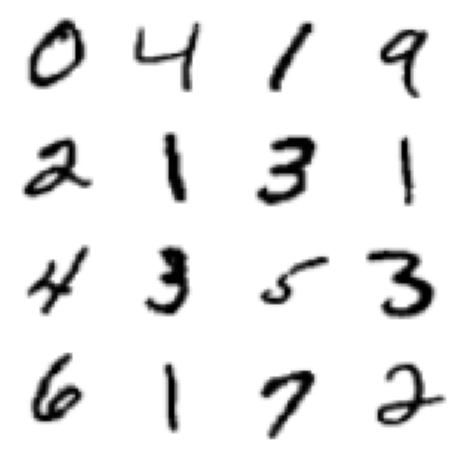

Mounted at /content/gdrive


In [ ]:
def create_invert_dataset (count):

  Real_image,Invert_image ,  Invert_target, Invert_Label= Invert_transform(batch_size,count)

  All_Data= Data_generated(Real_image,Invert_image ,Invert_target,Invert_Label,'cuda')
  Real_image,Invert_image ,  Invert_target, Invert_Label= RotateRight_transform(batch_size,count)
  All_Data.add_data(Real_image,Invert_image ,Invert_target,Invert_Label)

  Real_image,Invert_image ,  Invert_target, Invert_Label= RotateLeft_transform(batch_size,count)
  All_Data.add_data(Real_image,Invert_image ,Invert_target,Invert_Label)

 
 
  return All_Data

Invert_Data=create_invert_dataset(count= 20000)

#
import matplotlib.pyplot as plt


print("answer", Invert_Data.size())
def show_images():
    gen_imgs= Invert_Data.Realimage[1:17,].to('cpu').detach().numpy() .squeeze()


    fig,axs = plt.subplots(4,4,figsize=(8,8),sharey=True,sharex=True)

    cnt=0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(gen_imgs[cnt,],cmap='gray')
            axs[i, j].axis('off')
            cnt+=1

    plt.show()
    cnt=0
import torchvision
def show_Invert_images():
    gen_imgs= Invert_Data.TransImage[1:17,].to('cpu').detach().numpy() .squeeze()

    fig,axs = plt.subplots(4,4,figsize=(8,8),sharey=True,sharex=True)

    cnt=0
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(gen_imgs[cnt,],cmap='gray')
            axs[i, j].axis('off')
            cnt+=1

    plt.show()


show_images()
show_Invert_images()

import os
import torch
from google.colab import drive
drive.mount('/content/gdrive')
corpus = os.path.join("/content/gdrive/MyDrive/Colab Notebooks/Data/", 'Invert_Data.pt')
torch.save(Invert_Data,corpus)


In [ ]:

''' ******************************************************
****************************    imports    ***************
********************************************************'''
import os
import torch
from torch import nn
from time import time
from torch import optim
import torchvision as tv
from google.colab import drive
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms_Direction

''' *******************************************************************
****************************    Hyperparameters    ********************
********************************************************************'''

BATCH_SIZE=100
batch_size = BATCH_SIZE

description='Learning Independent Causal Mechanisms'
datadir='./data'
outdir='.'
dataset='MNIST'    
optimizer_experts='adam'
optimizer_discriminator ='adam'
optimizer_initialize ='adam'
generated_label=0
canonical_label=1

real_data_size=28*28
transferred_data_size= 32*32
epoch_number = 1000
seed =11
log_interval=10
learning_rate_initialize=1e-1
learning_rate_expert = 1e-3
learning_rate_discriminator=1e-3
learning_rate=1e-4
name=''
weight_decay=0
num_experts=2
torch.manual_seed(seed)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.manual_seed_all(seed)
cuda= True
weight_decay=0;
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class Data_generated:
    def __init__(self, Realimage,TransImage,target,label,device):
        super().__init__()
        self.device= device
        self.target=target.squeeze().to(self.device)
        self.label=label.squeeze().to(self.device)
        self.Realimage=Realimage.squeeze()
        self.Realimage=Realimage.to(self.device)
        self.TransImage=TransImage.squeeze()
        self.TransImage=TransImage.to(self.device)
    def to(self, device):
        self.device= device
        self.target=self.target.to(self.device)
        self.label=self.label.to(self.device)
        self.Realimage=image.to(self.device)
        self.TransImage=TransImage.to(self.device)
    def __len__(self):
      return self.Realimage.size(0)
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
  
        sample = (self.Realimage[idx], self.TransImage[idx],  self.target[idx],self.label[idx])

        return sample
    def size(self):
     

        sample = (self.Realimage.size(),self.TransImage.size(),  self.target.size(),self.label.size())

        return sample
    def add_data(self,x,w,y,z):
      x=x.squeeze().to(self.device)
      y=y.squeeze().to(self.device)
      z=z.squeeze().to(self.device)
      w=w.squeeze().to(self.device)


      self.Realimage= torch.cat((self.Realimage,x),0)
      self.TransImage= torch.cat((self.TransImage,w),0)

      self.target=torch.cat((self.target,y),0)
      self.label=torch.cat((self.label,z),0)






drive.mount('/content/gdrive')
corpus = os.path.join("/content/gdrive/My Drive/Colab Notebooks/Data/", 'Invert_Data.pt')
Collection_Data= torch.load(corpus)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# -*- coding: utf-8 -*-
"""LICMS_Final_Version_invert.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Cn6v-8pEGmYJNVgL2EFfBlHyvi60fJ01
"""


''' *******************************************************************
****************************    Expert Class    ********************
********************************************************************'''
class Expert(nn.Module):
    def __init__(self, latent_dim=28*28, batchnorm=True):
        """A Expert for mapping a latent space to a sample space.
        The sample space for this expert is single-channel, 28x28 images
        with pixel intensity ranging from -1 to +1.
        Args:
            latent_dim (int): latent dimension ("transfered image")
            batchnorm (bool): Whether or not to use batch normalization
        """
        super(Expert, self).__init__()
        self.latent_dim = latent_dim
        self.batchnorm = batchnorm
        self._init_modules()

    def _init_modules(self):
        """Initialize the modules."""
        # Project the input
        self.linear1 = nn.Linear(self.latent_dim, 256*7*7, bias=False)
        self.bn1d1 = nn.BatchNorm1d(256*7*7) if self.batchnorm else None
        self.leaky_relu = nn.LeakyReLU()

        # Convolutions
        self.conv1 = nn.Conv2d(
                in_channels=256,
                out_channels=128,
                kernel_size=5,
                stride=1,
                padding=2,
                bias=False)
        self.bn2d1 = nn.BatchNorm2d(128) if self.batchnorm else None

        self.conv2 = nn.ConvTranspose2d(
                in_channels=128,
                out_channels=64,
                kernel_size=4,
                stride=2,
                padding=1,
                bias=False)
        self.bn2d2 = nn.BatchNorm2d(64) if self.batchnorm else None

        self.conv3 = nn.ConvTranspose2d(
                in_channels=64,
                out_channels=1,
                kernel_size=4,
                stride=2,
                padding=1,
                bias=False)
        self.tanh = nn.Tanh()

    def forward(self, input_tensor):
        """Forward pass; map latent vectors to samples."""
        intermediate = self.linear1(input_tensor)
        intermediate = self.bn1d1(intermediate)
        intermediate = self.leaky_relu(intermediate)

        intermediate = intermediate.view((-1, 256, 7, 7))

        intermediate = self.conv1(intermediate)
        if self.batchnorm:
            intermediate = self.bn2d1(intermediate)
        intermediate = self.leaky_relu(intermediate)

        intermediate = self.conv2(intermediate)
        if self.batchnorm:
            intermediate = self.bn2d2(intermediate)
        intermediate = self.leaky_relu(intermediate)

        intermediate = self.conv3(intermediate)
        output_tensor = self.tanh(intermediate)
        return output_tensor






In [ ]:
''' *******************************************************************
************************    Discriminator Class    ********************
********************************************************************'''


class Discriminator(nn.Module):
    def __init__(self):
        """A discriminator for discerning real from generated images.
        Images must be single-channel and 28x28 pixels.
        Output activation is Sigmoid.
        """
        super(Discriminator, self).__init__()
        self._init_modules()  # I know this is overly-organized. Fight me.

    def _init_modules(self):
        """Initialize the modules."""
        self.conv1 = nn.Conv2d(
                in_channels=1,
                out_channels=64,
                kernel_size=5,
                stride=2,
                padding=2,
                bias=True)
        self.leaky_relu = nn.LeakyReLU()
        self.dropout_2d = nn.Dropout2d(0.3)

        self.conv2 = nn.Conv2d(
                in_channels=64,
                out_channels=128,
                kernel_size=5,
                stride=2,
                padding=2,
                bias=True)

        self.linear1 = nn.Linear(128*7*7, 1, bias=True)
        self.sigmoid = nn.Sigmoid()

    def forward(self, input_tensor):
        """Forward pass; map samples to confidence they are real [0, 1]."""
        intermediate = self.conv1(input_tensor)
        intermediate = self.leaky_relu(intermediate)
        intermediate = self.dropout_2d(intermediate)

        intermediate = self.conv2(intermediate)
        intermediate = self.leaky_relu(intermediate)
        intermediate = self.dropout_2d(intermediate)

        intermediate = intermediate.view((-1, 128*7*7))
        intermediate = self.linear1(intermediate)
        
        output_tensor = self.sigmoid(intermediate)

        return output_tensor

In [ ]:


#******************************************************************
#*******************************    Learning Independent Causal Mechanisms Class    ********************
#*******************************************************************'''

class Learning_Independent_Causal_Mechanisms():
  def __init__(self,  Real_data,Transferred_data,batch_size=100, device='cuda', lr_d=1e-3, lr_g=2e-4):
       
        self.Experts=  [Expert(transferred_data_size).to(device) for i in range(num_experts)]
        self.discriminator = Discriminator().to(device)
        self.Real_data = Real_data
        self.Transferred_data= Transferred_data
        self.batch_size = batch_size
        self.device = device
        self.criterion = nn.BCELoss()
        self.loss= nn.MSELoss()
        self.optim_d = optim.Adam(self.discriminator.parameters(),lr=lr_d, betas=(0.5, 0.999))
        self.optimizerS_E=[]
        for i in range(num_experts):
            self.optimizer_E = torch.optim.Adam(self.Experts[i].parameters(), lr=lr_g, betas=(0.5, 0.999))
            self.optimizerS_E.append(self.optimizer_E)
        for i in range(num_experts):
          self.optimizer_E = torch.optim.Adam(self.Experts[i].parameters(), lr=learning_rate, weight_decay=weight_decay)
          self.optimizerS_E.append(self.optimizer_E)
        self.optimizer_discriminator = torch.optim.Adam(self.discriminator.parameters(), lr=learning_rate, weight_decay=weight_decay)
   
#==========================================================================================================
#================================     expert[idx]_train         ===========================================
#==========================================================================================================='''  
  def train_step_expert(self,real_img,transferred_img,transferrd_evaluation_label,idx):
    self.Experts[idx].zero_grad()

    generated_img= self.Experts[idx](transferred_img.to(self.device)) # generated image is produced by Experts[idx]
    classifications = self.discriminator(generated_img.to(self.device))
    real_img= real_img.view(real_img.size(0),1, 28,28).to('cuda')
    lossE = self.loss(generated_img, real_img)
    lossE.backward()
    self.optimizerS_E[idx].step()
#==========================================================================================================
#================================     discriminator_train  ======================================
#==========================================================================================================='''  
  def discriminator_train(self,image,evaluation_label ):
    image= image.view(batch_size, 1,28,28).to(self.device)
    evaluation_label= evaluation_label.view(self.batch_size,1)
    self.discriminator.zero_grad()
    output = self.discriminator(image.to(self.device))
    lossD = self.criterion(output, evaluation_label)
    lossD.backward()
    self.optimizer_discriminator.step()
#==========================================================================================================
#================================     discriminator_train  ======================================
#==========================================================================================================='''  
  def discriminator_train_secondary(self,image,evaluation_label , n_samples):
    image= image.view(n_samples, 1,28,28).to(self.device)
    evaluation_label= evaluation_label.view(n_samples,1)
    self.discriminator.zero_grad()
    output = self.discriminator(image.to(self.device))
    lossD = self.criterion(output, evaluation_label)
    lossD.backward()
    self.optimizer_discriminator.step()

#==========================================================================================================
#================================     Initial_discriminator_train  ======================================
#==========================================================================================================='''  
  def Initial_discriminator_train(self,transferred_data):
    real_label=torch.ones(self.batch_size,1).to(device)
    generated_label=torch.zeros(self.batch_size,1).to(device)
    for batch , data in enumerate(transferred_data):
      x,w,y,z= data
      self.discriminator_train(x,real_label)
      transferred_img= w.view(self.batch_size,transferred_data_size).to(device)
      #for idx, expert in enumerate(self.Experts): 
      idx=0
      self.Experts[idx].zero_grad()
      generated_img= self.Experts[idx](transferred_img.to(self.device)) # generated image is produced by Experts[idx]
      self.discriminator_train(generated_img,generated_label)

#==========================================================================================================
#================================     epoch_expert_train  ==================================================
#==========================================================================================================='''  
  def epoch_expert_train(self, Transferred_Data):
    All_transferred_img= None
    All_real_img= None
    All_label= None

    All_expert_scores= None
    E_first =True
    g_first=True
    Total_discriminator_Generated_loss=0;
    discriminator_Generated_loss= None
    for batch , data in enumerate(Transferred_Data):
      E_first =True
      g_first=True
      real_img, Transferred_img,y,z= data
      Transferred_img= Transferred_img.view(self.batch_size,transferred_data_size).to(self.device)
      
      
      for idx, expert in enumerate(self.Experts): 
          self.Experts[idx].zero_grad()
          generated_img= self.Experts[idx](Transferred_img.to(self.device)) # generated image is produced by Experts[idx]
          score_idx=self.discriminator(generated_img.to(self.device))
          
          if (E_first==True):
              All_expert_scores=score_idx
              E_first =False
          else:
              All_expert_scores= torch.cat((All_expert_scores,score_idx),-1) 
      if g_first== True:
            All_transferred_img= Transferred_img
            All_real_img= real_img

            g_first=False
      else:
            All_transferred_img=torch.cat((All_transferred_img,Transferred_img),0)
            All_real_img=torch.cat((All_real_img,real_img),0)
            
      #------------------------------------------------------
      #--------------------- Find Winner expert--------------
      #-------------------------------------------------------
      if ( batch >=0):
        mask_winners = All_expert_scores.argmax(dim=1)
        idx_winners= mask_winners.to(device)
        #print ("idx_winners:" , idx_winners)
        #========================================================
        # ================= Update Winner expert ================
        #===========================================================
        for exp_idx, expert in enumerate(self.Experts):
            winning_indexes = idx_winners.eq(exp_idx).nonzero().squeeze(dim=-1)
            #print(exp_idx, ": winning_indexes",winning_indexes, "size=", winning_indexes.size())
            #print(exp_idx,  ": , size=", winning_indexes.size())

            n_samples = winning_indexes.size(0)
            #print("n_samples" , n_samples)
            if n_samples >2:
              winner_image = All_transferred_img[winning_indexes]
              winner_real = All_real_img[winning_indexes]
              #print("sample size:", winner_image.size())
              labels = torch.full((n_samples,), 0, device=self.device).unsqueeze(dim=1).float()
              self.train_step_expert(winner_real,winner_image,labels,exp_idx)
              winner_generated_img= self.Experts[idx](winner_image.to(self.device)) # generated image is produced by Experts[idx]
              labels= torch.ones(n_samples,1).to(device)
              #self.discriminator_train_secondary(winner_generated_img,labels, n_samples)

In [ ]:

Transferred_data= DataLoader(Collection_Data, batch_size=batch_size, shuffle=True)

licms = Learning_Independent_Causal_Mechanisms(Real_data= Transferred_data, Transferred_data= Transferred_data,batch_size=BATCH_SIZE, device='cuda', lr_d=1e-3, lr_g=2e-4)


In [ ]:
for i in range(10):
  if (i%1==0):
    print (" Disriminator epoch :" , i)
  licms.Initial_discriminator_train(Transferred_data)

 Disriminator epoch : 0
 Disriminator epoch : 1
 Disriminator epoch : 2
 Disriminator epoch : 3
 Disriminator epoch : 4
 Disriminator epoch : 5
 Disriminator epoch : 6
 Disriminator epoch : 7
 Disriminator epoch : 8
 Disriminator epoch : 9


In [ ]:
for i in range(10):
  if (i%1==0):
    print ('Expert epoch : ',i)
  licms.epoch_expert_train(Transferred_data)

Expert epoch :  0
Expert epoch :  1
Expert epoch :  2
Expert epoch :  3
Expert epoch :  4
Expert epoch :  5
Expert epoch :  6
Expert epoch :  7
Expert epoch :  8
Expert epoch :  9


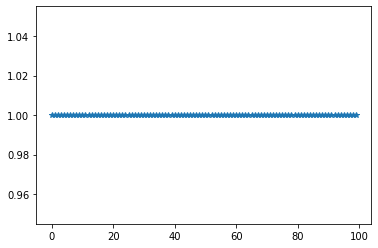

In [ ]:




########################### Discriminator test
import matplotlib.pyplot as plt

Transferred_data= DataLoader(Collection_Data, batch_size=batch_size, shuffle=True)
for x in Transferred_data:
  real,trans_img,e,r= x
real= real.view(batch_size, 1,28,28).to('cuda')

for i in range(1):
  k=licms.discriminator(real.to('cuda'))
  plt.plot(k.to('cpu').detach().numpy(), marker='*', linestyle='-')
  plt.show()



In [ ]:
# Test Data

Invert_Data=create_invert_dataset(count= 40000)



label= 6 Invert
label= 3 Rotate Right
label= 2 Rotate Left


Expert %d: 0


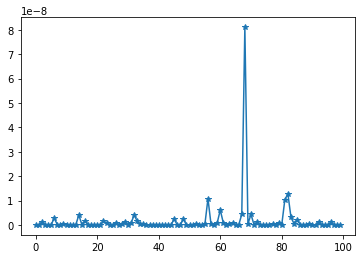

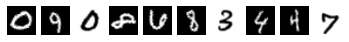

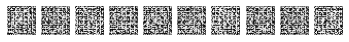

Expert %d: 1


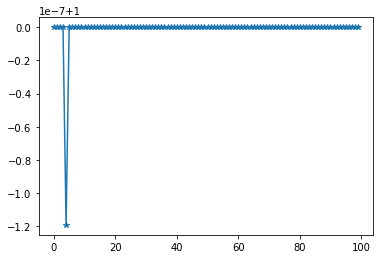

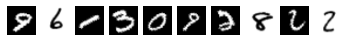

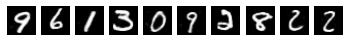

In [ ]:
#=================================== discriminator (expert[0]) test
import matplotlib.pyplot as plt
for idx in range(num_experts):
  print ("Expert %d:",idx)
  Transferred_data= DataLoader(Collection_Data, batch_size=batch_size, shuffle=True)
  for x in Transferred_data:
    real,trans_img,e,t= x

  transferred_img= trans_img.view(batch_size,transferred_data_size).to(device)
  transferred_evaluation_label= t.view(batch_size,1)
  licms.Experts[idx].zero_grad()
  generated_img= licms.Experts[idx](transferred_img.to('cuda')) # generated image is produced by Experts[idx]
  k=licms.discriminator(generated_img)
  plt.plot(k.to('cpu').detach().numpy(), marker='*', linestyle='-')
  plt.show()
  show_transferred_images(1)
  show_images(1)



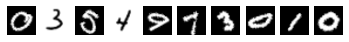

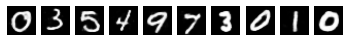

In [ ]:
# show test imge x : x+16
show_transferred_images(17)
show_images(17)